<a href="https://colab.research.google.com/github/Hadiasemi/Data301/blob/main/Copy_of_DATA_301_Lab_4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authorship of the Federalist Papers

The _Federalist Papers_ were a set of 85 essays published between 1787 and 1788 to promote the ratification of the United States Constitution. They were originally published under the pseudonym "Publius". Although the identity of the authors was a closely guarded secret at the time, most of the papers have since been conclusively attributed to one of Hamilton, Jay, or Madison. The known authorships can be found in `https://dlsun.github.io/pods/data/federalist/authorship.csv`.

For 15 of the papers, however, the authorships remain disputed. (These papers can be identified from the `authorship.csv` file because the "Author" field is blank.) In this analysis, you will use the papers with known authorship to predict the authorships of the disputed papers. The text of each paper is available at `https://dlsun.github.io/pods/data/federalist/x.txt`, where `x` is the number of the paper (i.e., a number from 1 to 85). The name of the file indicates the number of the paper.

## Question 1 (3 points)

When analyzing an author's style, common words like "the" and "on" are actually more useful than rare words like "hostilities". That is because rare words typically signify context. Context is useful if you are trying to find documents about similar topics, but not so useful if you are trying to identify an author's style because different authors can write about the same topic. For example, both Dr. Seuss and Charles Dickens used rare words like "chimney" and "stockings" in _How the Grinch Stole Christmas_ and _A Christmas Carol_, respectively. But they used common words very differently: Dickens used the word "upon" over 100 times, while Dr. Seuss did not use "upon" even once.

Read in the Federalist Papers. Convert each one into a vector of term frequencies. In order to restrict to common words, include only the top 50 words across the corpus. (Because we are restricting to the most common words already, there is no reason to reweight them using TF-IDF.)

In [ ]:
import pandas as pd
import requests

df = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv")
df['Author'].unique()

df_paper = pd.Series()
for i in df["Paper"]:
  link = f"https://dlsun.github.io/pods/data/federalist/{i}.txt"
  response = requests.get(link)
  df_paper[str(i)] = response.text
 
df_paper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


1     To the People of the State of New York:\n\nAFT...
2     To the People of the State of New York:\n\nWHE...
3     To the People of the State of New York:\n\nIT ...
4     To the People of the State of New York:\n\nMY ...
5     To the People of the State of New York:\n\nQUE...
                            ...                        
81    To the People of the State of New York:\n\nLET...
82    To the People of the State of New York:\n\nTHE...
83    To the People of the State of New York:\n\nTHE...
84    To the People of the State of New York:\n\nIN ...
85    To the People of the State of New York:\n\nACC...
Length: 85, dtype: object

In [ ]:
from collections import Counter
words = (
    df_paper.str.lower().
    str.replace("[^\w\s]", " ").
    fillna(' ').
    str.split()
).apply(Counter)
bag = words.sum().most_common(n=50)
bag

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


[('the', 17767),
 ('of', 11824),
 ('to', 7074),
 ('and', 5099),
 ('in', 4456),
 ('a', 3991),
 ('be', 3825),
 ('that', 2792),
 ('it', 2550),
 ('is', 2194),
 ('which', 2068),
 ('by', 1741),
 ('as', 1721),
 ('this', 1410),
 ('would', 1273),
 ('have', 1262),
 ('will', 1255),
 ('for', 1237),
 ('or', 1233),
 ('not', 1215),
 ('their', 1098),
 ('with', 1053),
 ('from', 1043),
 ('are', 1032),
 ('on', 952),
 ('they', 928),
 ('an', 927),
 ('states', 851),
 ('government', 829),
 ('may', 816),
 ('been', 798),
 ('state', 787),
 ('all', 731),
 ('but', 697),
 ('its', 651),
 ('other', 646),
 ('people', 612),
 ('has', 603),
 ('power', 603),
 ('more', 579),
 ('at', 568),
 ('if', 563),
 ('than', 550),
 ('them', 548),
 ('one', 547),
 ('any', 545),
 ('no', 506),
 ('those', 481),
 ('can', 465),
 ('constitution', 463)]

## Question 2 (3 points)

Make a visualization that summarizes the most common words used by Hamilton, Madison, and Jay.

In [ ]:
import pandas as pd
import requests

df = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv")

df = df[(df['Author'] == 'Hamilton') | (df['Author'] == 'Madison') | (df['Author'] == 'Jay')]

df_author = pd.Series()
for i in df["Paper"]:
  link = f"https://dlsun.github.io/pods/data/federalist/{i}.txt"
  response = requests.get(link)
  df_paper[str(i)] = response.text
 
df_paper

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


1     To the People of the State of New York:\n\nAFT...
2     To the People of the State of New York:\n\nWHE...
3     To the People of the State of New York:\n\nIT ...
4     To the People of the State of New York:\n\nMY ...
5     To the People of the State of New York:\n\nQUE...
                            ...                        
81    To the People of the State of New York:\n\nLET...
82    To the People of the State of New York:\n\nTHE...
83    To the People of the State of New York:\n\nTHE...
84    To the People of the State of New York:\n\nIN ...
85    To the People of the State of New York:\n\nACC...
Length: 85, dtype: object

In [ ]:
words = (
    df_paper.str.lower().
    str.replace("[^\w\s]", " ").
    fillna(' ').
    str.split()
).apply(Counter)
df_author  = pd.DataFrame(list(words)).fillna(0)
df_author

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,to,the,people,of,state,new,york,after,an,unequivocal,...,abate,dint,demagogue,prodigy,completion,trembling,recommence,hume,essays,128
0,72,133,6,106,6,7,1,2.0,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,107,23,83,1,3,1,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56,93,8,62,8,2,1,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51,86,8,72,6,1,1,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,66,3,53,2,1,1,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,163,389,1,248,26,9,2,0.0,22,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,83,168,1,94,18,3,2,0.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,219,485,3,331,33,10,5,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,140,390,11,293,27,10,3,3.0,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


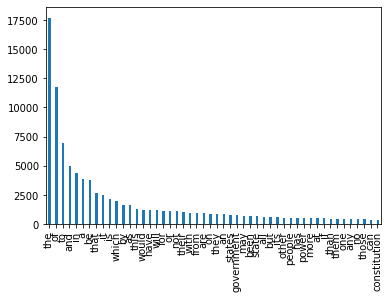

In [ ]:
total =df_author[df_author.sum(axis=0).sort_values(ascending=False).nlargest(50).axes[0].tolist()]
total.sum().plot(kind='bar', edgecolor='white', linewidth=1)

## Question 3 (6 points)

For each of the documents with disputed authorships, find the 5 most similar documents with _known_ authorships, using cosine distance on the term frequencies. Use the authors of these 5 most similar documents to predict the author of each disputed document. (For example, if 3 of the 5 closest documents were written by Hamilton, 1 by Madison, and 1 by Jay, then we would predict that the disputed document was written by Hamilton.)

In [ ]:
import pandas as pd
df = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv")

df_author_na = df[(df['Author'].isna() == True)]
df_author_na


,Paper,Author
17,18,NaN
18,19,NaN
19,20,NaN
48,49,NaN
49,50,NaN
50,51,NaN
51,52,NaN
52,53,NaN
53,54,NaN
54,55,NaN


In [ ]:
list_na_paper = df_author_na.index.tolist()
list_na_paper

[17, 18, 19, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 61, 62]

In [ ]:
data_dir = "https://dlsun.github.io/pods/data/federalist/"

df = pd.Series()
for i in range(1,86):
    papers = requests.get(data_dir + str(i) + ".txt", "r")
    df[str(i)] = papers.text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
vec.fit(df)
tf_sparse = vec.transform(df)
tf_sparse

<85x8616 sparse matrix of type '<class 'numpy.int64'>'
	with 59720 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
sim = cosine_similarity(tf_sparse)[list_na_paper]
sim

array([[0.90596805, 0.88155514, 0.84546106, ..., 0.90085607, 0.9243707 ,
        0.92776822],
       [0.92003198, 0.89044068, 0.8695424 , ..., 0.91613905, 0.93532446,
        0.94650567],
       [0.91689142, 0.89470454, 0.87971766, ..., 0.92039505, 0.93012563,
        0.94036244],
       ...,
       [0.9447913 , 0.87475328, 0.8902828 , ..., 0.94571245, 0.96347786,
        0.95455573],
       [0.95928316, 0.90658409, 0.91494865, ..., 0.95163878, 0.96997916,
        0.96514785],
       [0.94720886, 0.89609865, 0.88921347, ..., 0.95023312, 0.96664331,
        0.95836089]])

In [ ]:
df_author

,to,the,people,of,state,new,york,after,an,unequivocal,...,abate,dint,demagogue,prodigy,completion,trembling,recommence,hume,essays,128
0,72,133,6,106,6,7,1,2.0,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,107,23,83,1,3,1,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56,93,8,62,8,2,1,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51,86,8,72,6,1,1,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,66,3,53,2,1,1,0.0,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,163,389,1,248,26,9,2,0.0,22,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,83,168,1,94,18,3,2,0.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,219,485,3,331,33,10,5,0.0,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,140,390,11,293,27,10,3,3.0,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
df = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv")

df_author = df[~(df['Author'].isna() == True)]
df_author

,Paper,Author
0,1,Hamilton
1,2,Jay
2,3,Jay
3,4,Jay
4,5,Jay
...,...,...
80,81,Hamilton
81,82,Hamilton
82,83,Hamilton
83,84,Hamilton


In [ ]:
df = pd.DataFrame(sim).T
df['Author'] = df_author["Author"]
df.dropna(inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Author
0,0.905968,0.920032,0.916891,0.941161,0.920392,0.931366,0.943491,0.948884,0.929050,0.955934,0.937669,0.956851,0.944791,0.959283,0.947209,Hamilton
1,0.881555,0.890441,0.894705,0.884401,0.886484,0.858738,0.884509,0.889816,0.868165,0.888409,0.881986,0.894119,0.874753,0.906584,0.896099,Jay
2,0.845461,0.869542,0.879718,0.881396,0.880312,0.877678,0.884387,0.908900,0.875683,0.898355,0.885544,0.896237,0.890283,0.914949,0.889213,Jay
3,0.821702,0.849363,0.853237,0.843280,0.849095,0.822601,0.828486,0.863403,0.817071,0.854562,0.852520,0.852708,0.832061,0.874449,0.842473,Jay
4,0.792174,0.815647,0.817549,0.823515,0.830416,0.794273,0.804943,0.831604,0.787932,0.830244,0.825521,0.810824,0.806861,0.849763,0.811503,Jay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.922566,0.933468,0.931596,0.957350,0.939677,0.953771,0.957560,0.957881,0.961318,0.949759,0.937129,0.956040,0.959706,0.959347,0.960911,Hamilton
81,0.904807,0.918708,0.912833,0.938939,0.910493,0.924441,0.938603,0.936865,0.930244,0.937748,0.913109,0.934680,0.932998,0.934502,0.933059,Hamilton
82,0.900856,0.916139,0.920395,0.940560,0.925025,0.933685,0.943803,0.946732,0.952348,0.936281,0.920174,0.944302,0.945712,0.951639,0.950233,Hamilton
83,0.924371,0.935324,0.930126,0.960953,0.939222,0.956184,0.962705,0.964469,0.959418,0.965954,0.952396,0.972943,0.963478,0.969979,0.966643,Hamilton


In [ ]:
find_all_authors = []
for i in range(0, 15):
  df[i] = df[i].nlargest(5)
  find_all_authors.append(df[i].dropna())


In [ ]:
df = pd.DataFrame(find_all_authors)
col = df.columns

df_known_author = df_author[["Author"]].loc[col]
df_finalize = df.T
df_finalize["Author"] = df_known_author["Author"]
author = df_finalize.set_index("Author").unstack().dropna().to_frame()
author = author.rename(columns = {0: "CosineSim"})
author.index.value_counts()


(4, Madison)      5
(5, Madison)      5
(12, Madison)     5
(10, Hamilton)    5
(2, Madison)      4
(14, Madison)     4
(11, Madison)     4
(3, Madison)      3
(13, Hamilton)    3
(9, Hamilton)     3
(6, Madison)      3
(1, Hamilton)     3
(7, Madison)      3
(0, Madison)      3
(8, Hamilton)     3
(13, Madison)     2
(0, Hamilton)     2
(7, Hamilton)     2
(9, Madison)      2
(8, Madison)      2
(6, Hamilton)     2
(3, Hamilton)     2
(1, Madison)      2
(11, Hamilton)    1
(2, Hamilton)     1
(14, Hamilton)    1
dtype: int64

In [ ]:
list_paper = df_author_na["Paper"].values.tolist()
list_paper

[18, 19, 20, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63]

(4, Madison)      5 - $Madison → Paper 50$

(5, Madison)      5 - $Madison → Paper 51$

(12, Madison)     5 - $Madison → Paper 58$


(10, Hamilton)    5 - $Hamilton → Paper 56$

(2, Madison)      4 - $Madison → Paper 20$


(14, Madison)     4 - $Madison → Paper 63$

(11, Madison)     4 - $Madison → Paper 57$

(3, Madison)      3 - $Madison → Paper 49$

(13, Hamilton)    3 - $Hamilton → Paper 62$

(9, Hamilton)     3 - $Hamilton → Paper 55$

(6, Madison)      3 - $Madison → Paper 52$

(1, Hamilton)     3 - $Hamilton → Paper 19$

(7, Madison)      3 - $Madison → Paper 53$

(0, Madison)      3 - $Madison → Paper 18$

(8, Hamilton)     3 - $Hamilton → Paper 54$



## Submission Instructions

- Restart this notebook and run the cells from beginning to end:
  - Go to Runtime > Restart and Run All.
- Download the notebook:
  - Go to File > Download > Download .ipynb.
- Submit your notebook file to the assignment on Canvas.
